In [3]:
import pandas as pd

filmes = pd.read_csv("ml-latest-small/movies.csv")
filmes.columns = ["filmeId","titulo","generos"]
filmes = filmes.set_index("filmeId")
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [4]:
notas = pd.read_csv("ml-latest-small/ratings.csv")
notas.columns = ["usuarioId","filmeId","nota","momento"]
notas.head(300)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
295,3,7899,4.5,1306464036
296,3,7991,5.0,1306463684
297,3,26409,4.5,1306463993
298,3,70946,5.0,1306463815


In [13]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [14]:
total_de_votos = notas["filmeId"].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [15]:
filmes.loc[356]

titulo          Forrest Gump (1994)
generos    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [16]:
filmes["total_de_votos"] = total_de_votos

In [17]:
filmes

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0
...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0
193585,Flint (2017),Drama,1.0


In [18]:
filmes.sort_values("total_de_votos", ascending=False)
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [19]:
notas_medias = notas.groupby("filmeId").mean().nota
filmes["notas_medias"] = notas_medias
filmes.sort_values("notas_medias", ascending=False).head(10)

,titulo,generos,total_de_votos,notas_medias
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [20]:
filmes.query("total_de_votos >= 50").sort_values("notas_medias", ascending=False).head(10)

,titulo,generos,total_de_votos,notas_medias
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [21]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50").sort_values("notas_medias", ascending=False)
filmes_com_mais_de_50_votos.head(10)

,titulo,generos,total_de_votos,notas_medias
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [22]:
eu_assisti = [1, 21, 19, 10, 11, 7 ,2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,notas_medias
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [23]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos == 'Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values("notas_medias",  ascending=False)

,titulo,generos,total_de_votos,notas_medias
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


# Procurar usuarios similares

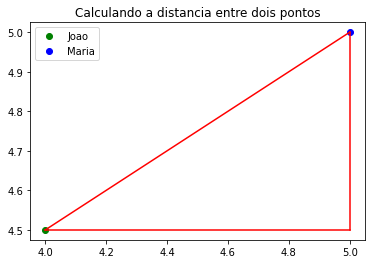

In [24]:
joao = [4, 4.5]
maria = [5, 5]

import matplotlib.pyplot as plt

plt.plot(4, 4.5, "go")
plt.plot(5, 5, "bo")

plt.legend(["Joao", "Maria"])
plt.title("Calculando a distancia entre dois pontos")

plt.plot([4, 5], [4.5, 4.5], color="r", linestyle="-")
plt.plot([4, 5], [4.5, 5], color="r" ,linestyle="-")
plt.plot([5, 5], [5, 4.5], color="r" ,linestyle="-")

In [25]:
import numpy as np

joao = np.array(joao)
maria = np.array(maria)

joao - maria

array([-1. , -0.5])

In [26]:
from math import sqrt
def pitaguras(a, b):
    (delta_x, delta_y) = a - b
    return sqrt(delta_x ** 2 + delta_y ** 2)

In [27]:
pitaguras(joao, maria)

1.118033988749895

In [28]:
np.linalg.norm(joao - maria)

1.118033988749895

In [29]:
def pitaguras(a, b):
    return np.linalg.norm(a - b)

In [30]:
pitaguras(joao, maria)

1.118033988749895

In [31]:
def distancia_vetores(a, b):
    return np.linalg.norm(a - b)

In [32]:
def notas_do_usuario(usuario):
    salvar_notas_do_usuario = notas.query(f"usuarioId == {usuario}")
    salvar_notas_do_usuario = salvar_notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
    return salvar_notas_do_usuario

In [33]:
notas_do_usuario(1)

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [34]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [35]:
diferencas = usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita").dropna()
diferencas

,nota_esquerda,nota_direita
filmeId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0
457,5.0,5.0
553,5.0,2.0
593,4.0,5.0
608,5.0,5.0


In [36]:
distancia_vetores(diferencas["nota_esquerda"], diferencas["nota_direita"])

11.135528725660043

In [37]:
def distancia_de_usuarios(user1, user2):
    notas1 = notas_do_usuario(user1)
    notas2 = notas_do_usuario(user2)
    juncao = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
    distancia = distancia_vetores(juncao["nota_esquerda"], juncao["nota_direita"])
    return [user1, user2, distancia]

In [38]:
distancia_de_usuarios(1,4)

[1, 4, 11.135528725660043]

In [39]:
distancia_de_usuarios(1,2)

[1, 2, 1.4142135623730951]

In [40]:
quantidade_de_usuarios = len(notas.usuarioId.unique())
quantidade_de_usuarios

610

In [41]:
def distancia_de_todos(voce_id):
    distancias = []
    for usuariosId in notas.usuarioId.unique():
        informacoes = distancia_de_usuarios(voce_id, usuariosId)
        distancias.append(informacoes)
    return distancias
distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [42]:
def distancia_de_todos(voce_id):
    todos_os_usuarios = notas.usuarioId.unique()
    distancias = [distancia_de_usuarios(voce_id, usuariosId) for usuariosId in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns=["voce","outra_pessoa","distancia"])
    return distancias
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


# ususarios sem nada em comun soa colocados bem distantes um do outro

In [80]:
def distancia_de_usuarios(user1, user2, minimo = 5):
    notas1 = notas_do_usuario(user1)
    notas2 = notas_do_usuario(user2)
    juncao = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()

    if len(juncao) < minimo:
        return None

    distancia = distancia_vetores(juncao["nota_esquerda"], juncao["nota_direita"])
    return [user1, user2, distancia]

In [82]:
print(distancia_de_usuarios(1, 85))

None


In [78]:
def mais_proximos_de_voce(voce_id):
    distancias = distancia_de_todos(voce_id)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(voce_id)
    return distancias

In [79]:
mais_proximos_de_voce(1)

,voce,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
...,...,...
462,1,14.790199
517,1,14.958275
608,1,15.264338


In [47]:
def mais_proximos_de_voce(voce_id, n = None):
    distancias = distancia_de_todos(voce_id, n)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(voce_id)
    return distancias

In [48]:
def distancia_de_todos(voce_id, n = None):
    todos_os_usuarios = notas.usuarioId.unique()
    if n:
        todos_os_usuarios = todos_os_usuarios[:n]
    distancias = [distancia_de_usuarios(voce_id, usuariosId) for usuariosId in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns=["voce","outra_pessoa","distancia"])
    return distancias


In [49]:
def distancia_de_todos(voce_id, n = None):
    todos_os_usuarios = notas.usuarioId.unique()
    if n:
        todos_os_usuarios = todos_os_usuarios[:n]
    distancias = [distancia_de_usuarios(voce_id, usuariosId) for usuariosId in todos_os_usuarios]
    distancias  = list(filter(None, distancias))
    distancias = pd.DataFrame(distancias, columns=["voce","outra_pessoa","distancia"])
    return distancias


In [50]:

def sugere_para(voce_id, n = None):
    notas_de_voce = notas_do_usuario(voce_id)
    filmes_que_voce_ja_viu = notas_de_voce.index
    similares = mais_proximos_de_voce(voce_id, n)
    similar = similares.iloc[0].name
    notas_do_similar = notas_do_usuario(similar)
    notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')
    recomendacoes = notas_do_similar.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)

In [51]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,notas_medias
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984


# Sugerindo tendo em conta varias pessoas

In [52]:
def mais_proximos_de(voce_id, n_mais_proximos=10, n = None):
  distancias = distancia_de_todos(voce_id, n = n)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias.head(n_mais_proximos)

In [53]:
mais_proximos_de(1, n_mais_proximos = 2, n=300)

,voce,distancia
outra_pessoa,,
77,1,0.0
258,1,1.0


In [54]:
def sugere_para(voce, n_mais_proximos = 10, n = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos, n = n)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

In [55]:
sugere_para(1, n = 50).head()

,nota,titulo,generos,total_de_votos,notas_medias
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
68157,5.0,Inglourious Basterds (2009),Action|Drama|War,88.0,4.136364
475,5.0,In the Name of the Father (1993),Drama,25.0,4.300000
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
7153,5.0,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919


In [56]:
sugere_para(1, n = 300).head()

,nota,titulo,generos,total_de_votos,notas_medias
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
802,5.0,Phenomenon (1996),Drama|Romance,46.0,3.336957
534,5.0,Shadowlands (1993),Drama|Romance,14.0,3.607143
1172,5.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,34.0,4.161765
515,5.0,"Remains of the Day, The (1993)",Drama|Romance,24.0,3.604167


In [57]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,notas_medias
filmeId,,,,,
1704,5.0,Good Will Hunting (1997),Drama|Romance,141.0,4.078014
57504,5.0,"Girl Who Leapt Through Time, The (Toki o kaker...",Animation|Comedy|Drama|Romance|Sci-Fi,10.0,4.100000
38304,5.0,No Direction Home: Bob Dylan (2005),Documentary,4.0,4.625000
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
2300,5.0,"Producers, The (1968)",Comedy,33.0,3.969697


In [58]:
def knn(voce_id, k_mais_proximos=10, n = None):
  distancias = distancia_de_todos(voce_id, n = n)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias.head(k_mais_proximos)

In [59]:
def sugere_para(voce, k_mais_proximos = 10, n = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, n = n)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

# Testando um novo utilizador

In [60]:
filmes.loc[[122904, 1246, 2529, 2329 , 2324 , 1 , 7 , 2 ,1196, 260]]

,titulo,generos,total_de_votos,notas_medias
filmeId,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54.0,3.833333
1246,Dead Poets Society (1989),Drama,86.0,3.959302
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,56.0,3.803571
2329,American History X (1998),Crime|Drama,129.0,4.217054
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,88.0,4.147727
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640


In [61]:
def novo_usuario(dados):
  novo_usuario = notas['usuarioId'].max()+1
  notas_do_usuario_novo = pd.DataFrame(dados, columns=["filmeId", "nota"])
  notas_do_usuario_novo['usuarioId'] = novo_usuario
  return pd.concat([notas, notas_do_usuario_novo])

In [62]:
notas = novo_usuario([[122904,2],[1246,5],[2529,2],[2329,5],[2324,5],[1,2],[7,0.5],[2,2],[1196,1],[260,1]])
notas.tail()

,usuarioId,filmeId,nota,momento
5,611,1,2.0,NaN
6,611,7,0.5,NaN
7,611,2,2.0,NaN
8,611,1196,1.0,NaN
9,611,260,1.0,NaN


In [63]:
sugere_para(611).head()

,nota,titulo,generos,total_de_votos,notas_medias
filmeId,,,,,
171495,5.0,Cosmos,(no genres listed),2.0,4.500000
81847,5.0,Tangled (2010),Animation|Children|Comedy|Fantasy|Musical|Roma...,24.0,3.916667
1873,5.0,"Misérables, Les (1998)",Crime|Drama|Romance|War,10.0,3.750000
8014,5.0,"Spring, Summer, Fall, Winter... and Spring (Bo...",Drama,10.0,4.250000
103141,5.0,Monsters University (2013),Adventure|Animation|Comedy,16.0,3.875000


# Utilizar somente as notas de filmes com mais de 50 votos

In [64]:
notas = notas.set_index("filmeId").loc[filmes_com_mais_de_50_votos.index]
notas.head()

,usuarioId,nota,momento
filmeId,,,
318,2,3.0,1.445715e+09
318,5,3.0,8.474349e+08
318,6,5.0,8.455532e+08
318,8,5.0,8.394635e+08
318,11,4.0,9.021551e+08


In [65]:
notas = notas.reset_index()
notas.head()

,filmeId,usuarioId,nota,momento
0,318,2,3.0,1.445715e+09
1,318,5,3.0,8.474349e+08
2,318,6,5.0,8.455532e+08
3,318,8,5.0,8.394635e+08
4,318,11,4.0,9.021551e+08


In [66]:
sugere_para(381).head()

,nota,titulo,generos,total_de_votos,notas_medias
filmeId,,,,,
122904,5.0,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54.0,3.833333
59315,5.0,Iron Man (2008),Action|Adventure|Sci-Fi,94.0,3.824468
1213,5.0,Goodfellas (1990),Crime|Drama,126.0,4.250000
1221,5.0,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
1246,5.0,Dead Poets Society (1989),Drama,86.0,3.959302


In [67]:
def sugere_para(voce, k_mais_proximos = 10, n = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, n = n)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  aparicoes = notas_dos_similares.groupby("filmeId").count()[['nota']]

  filtro_minimo = k_mais_proximos / 2
  recomendacoes = recomendacoes.join(aparicoes, lsuffix="_media_dos_usuarios", rsuffix="_aparicoes_nos_usuarios")
  recomendacoes = recomendacoes.query("nota_aparicoes_nos_usuarios >= %.2f" % filtro_minimo)
  recomendacoes = recomendacoes.sort_values("nota_media_dos_usuarios", ascending=False)
  recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu,errors='ignore')
  return recomendacoes.join(filmes)

In [68]:
def knn(voce_id, k_mais_proximos=10, n = None):
  distancias = distancia_de_todos(voce_id, n = n)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id, errors='ignore')
  return distancias.head(k_mais_proximos)

In [69]:
sugere_para(1, n=500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,notas_medias
filmeId,,,,,,
7153,4.750000,6,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919
58559,4.750000,6,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
4993,4.666667,6,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
318,4.642857,7,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
109487,4.583333,6,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151
79132,4.357143,7,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434


In [70]:
sugere_para(611).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,notas_medias
filmeId,,,,,,
318,4.500000,8,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
919,4.400000,5,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical,92.0,3.880435
79132,4.357143,7,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
356,4.350000,10,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
7361,4.312500,8,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131.0,4.160305
904,4.300000,5,Rear Window (1954),Mystery|Thriller,84.0,4.261905
593,4.222222,9,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
46578,4.214286,7,Little Miss Sunshine (2006),Adventure|Comedy|Drama,77.0,3.883117
4246,4.200000,5,Bridget Jones's Diary (2001),Comedy|Drama|Romance,65.0,3.623077


In [71]:
sugere_para(611, k_mais_proximos=20).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,notas_medias
filmeId,,,,,,
593,4.266667,15,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
296,4.264706,17,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
4973,4.192308,13,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,120.0,4.183333
318,4.176471,17,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
46578,4.150000,10,Little Miss Sunshine (2006),Adventure|Comedy|Drama,77.0,3.883117
590,4.136364,11,Dances with Wolves (1990),Adventure|Drama|Western,164.0,3.835366
7361,4.133333,15,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131.0,4.160305
4878,4.125000,12,Donnie Darko (2001),Drama|Mystery|Sci-Fi|Thriller,109.0,3.981651
1213,4.100000,10,Goodfellas (1990),Crime|Drama,126.0,4.250000
